# Exploring the Stock Market Data for Tesla Inc.

In this project, I shall be carrying out a deep exploration of Tesla trading data from June 2010 to February 2020. Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars, battery energy storage from home to grid scale, solar panels and solar roof tiles, as well as other related products and services.

The data  variables are the date of the stock trade, its opening and closing share price, its lowest and highest value for the day, and then the total volume traded. And the aim of this project is to uncover the associations, behaviours and trends of the variables in the data set

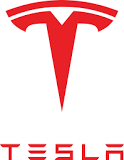

# Introduction and Overview of the Data

In [61]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import table
import datetime as dt

In [62]:
# Load the dataset
Data = pd.read_csv("TSLA.csv")
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,576.81,558.08,566.90,566.90,11788500
2412,2020-01-29,575.69,589.80,567.43,580.99,580.99,17801500
2413,2020-01-30,632.42,650.88,618.00,640.81,640.81,29005700
2414,2020-01-31,640.00,653.00,632.52,650.57,650.57,15719300


We need to observe the data types of the columns so as to carry out the necessary data type casting

In [63]:
# Observe datatypes
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [67]:
# type cast Date column to DateTime object
Data['Date'] = pd.to_datetime(Data['Date'])

In [9]:
# Disable the scientific notation to understand figures better
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive Statistics and Imputing Missing Values

In [10]:
# Get initial descriptive statistics
Data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,nan,nan,nan,nan,nan,nan
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan
first,2010-06-29 00:00:00,nan,nan,nan,nan,nan,nan
last,2020-02-03 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [11]:
# Before proceeding, check for NULL values. If found, perform imputation
Data.isnull().values.sum() # In this case, it is 0. So, we can proceed

0

# Visualizing the Period Variations in Market Share

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C90962C88>,
      dtype=object)

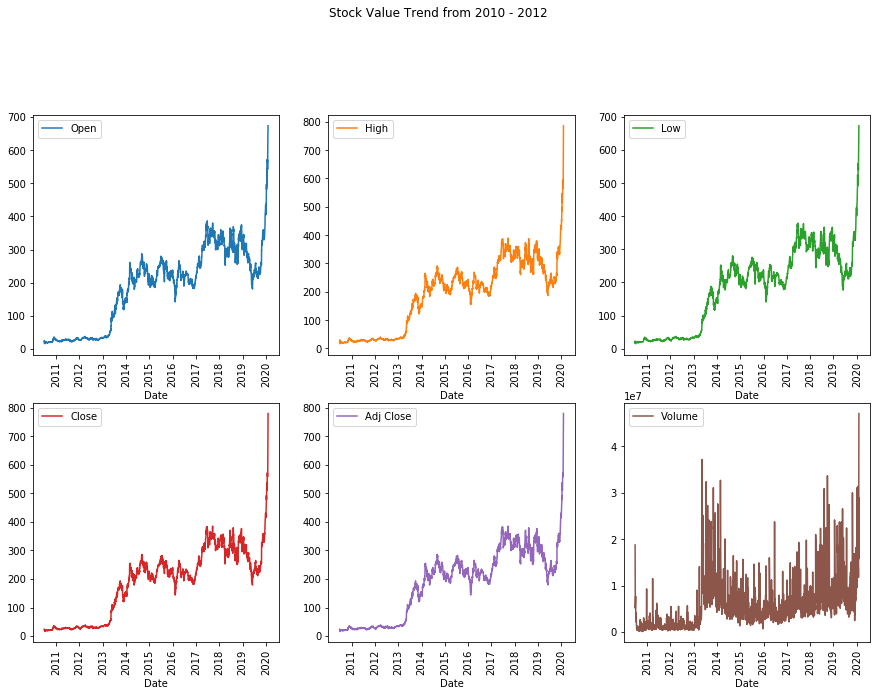

In [70]:
# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), 
          figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2010 - 2012", rot = 90)

# Visualizing the Spread and Skewness using Distribution Plot

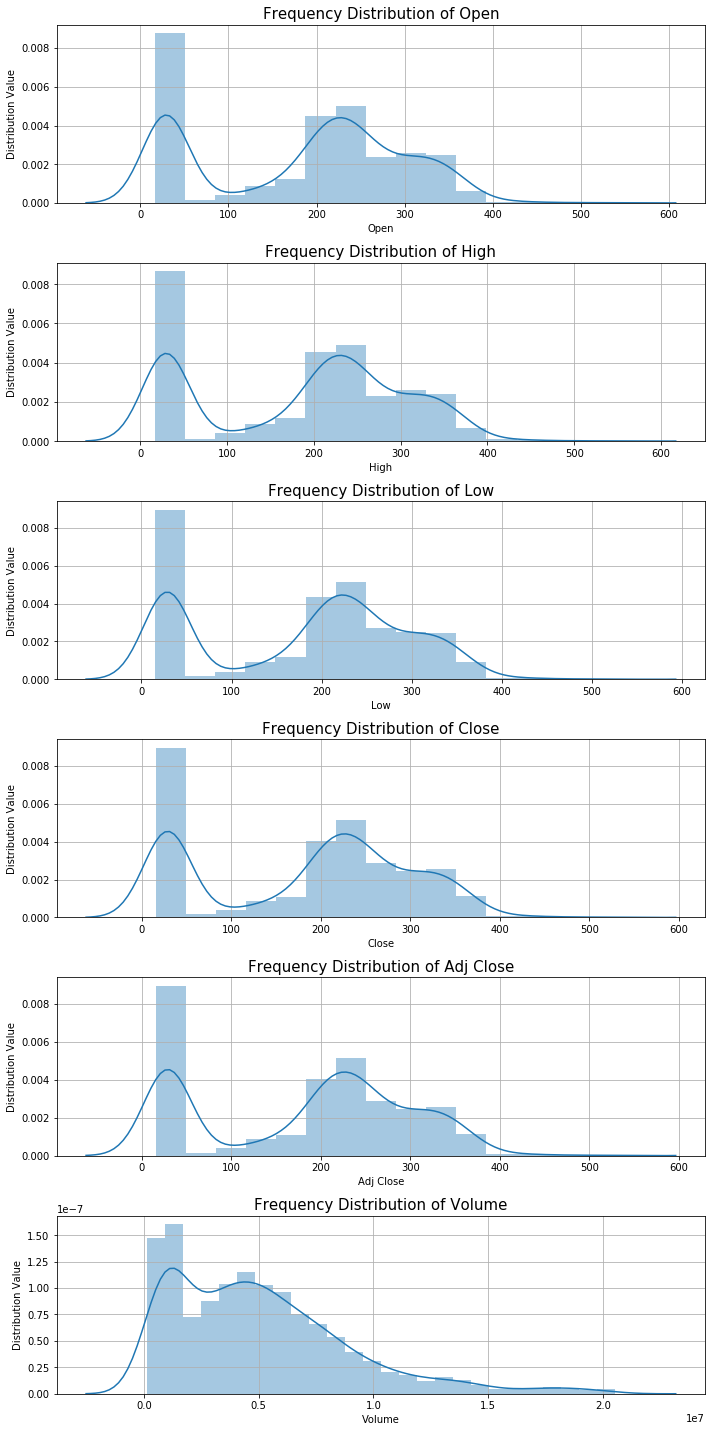

In [31]:


# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 15)
    ax[i].set_xlabel (col_list, fontsize = 10)
    ax[i].set_ylabel ('Distribution Value', fontsize = 10)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

# Observe and Visualize Correlations using the Pearson Method

In [19]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


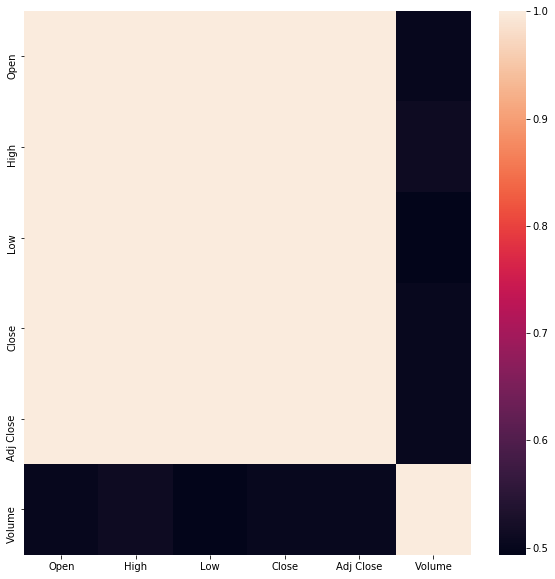

In [72]:
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = Data.corr() 
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

# Detecting Outliers using a Whisker Plot

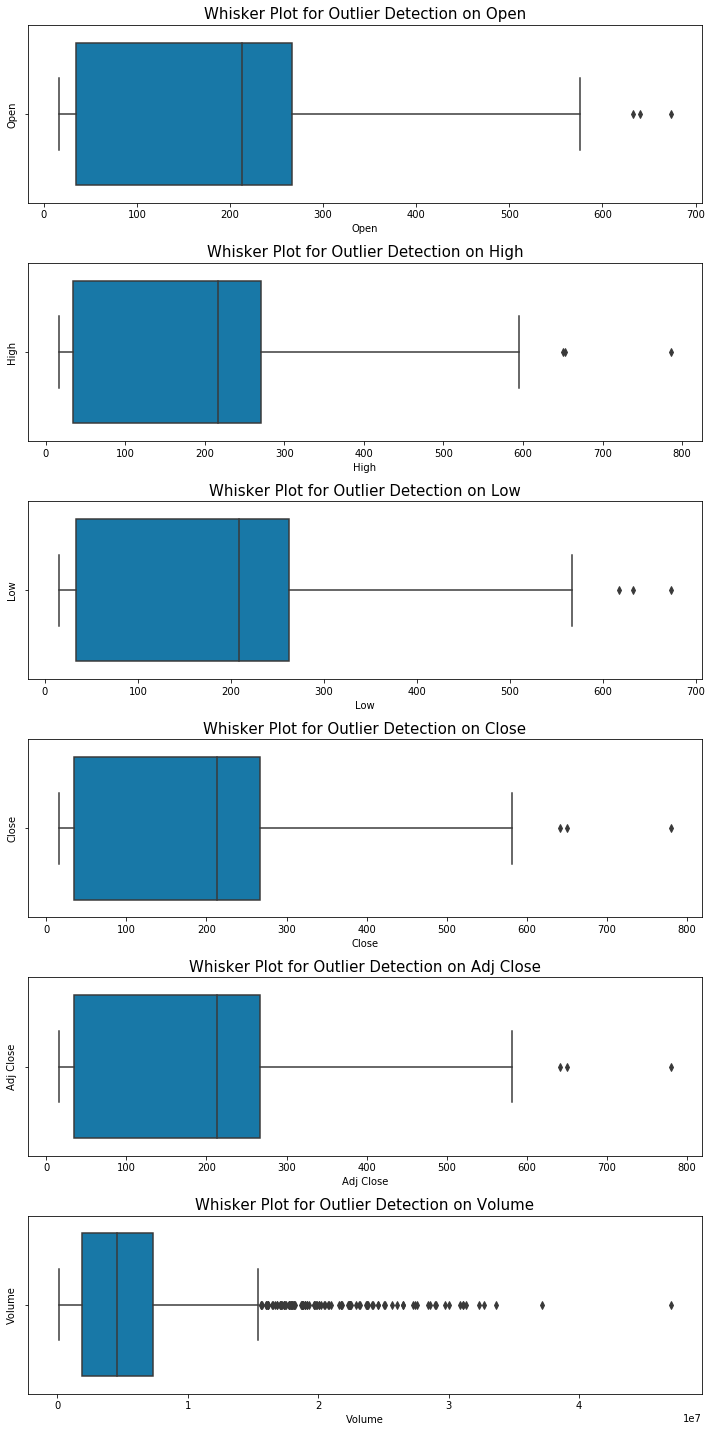

In [23]:
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 15)
    ax[i].set_ylabel(col_list, fontsize = 10)
    fig.tight_layout(pad = 1.1)

In [24]:
# It is evident from the whisker plots that there are some outliers in all the variables

# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = Data.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Convert into a dataframe

# Extract the IQR values 
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
Data = Data[(np.abs(stats.zscore(Data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
Data = Data.reset_index() # Due to elimination of rows, index has to be reset

# Now compare the new dimension with the old one (The one mentioned during the reading of the file)
Data # 2359 * 8

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...,...
2354,2396,2020-01-06,440.47,451.56,440.00,451.54,451.54,10133000
2355,2397,2020-01-07,461.40,471.63,453.36,469.06,469.06,17882100
2356,2400,2020-01-10,481.79,484.94,473.70,478.15,478.15,12959500
2357,2403,2020-01-15,529.76,537.84,516.79,518.50,518.50,17368800


# Trend Analysis of the Tesla Stock

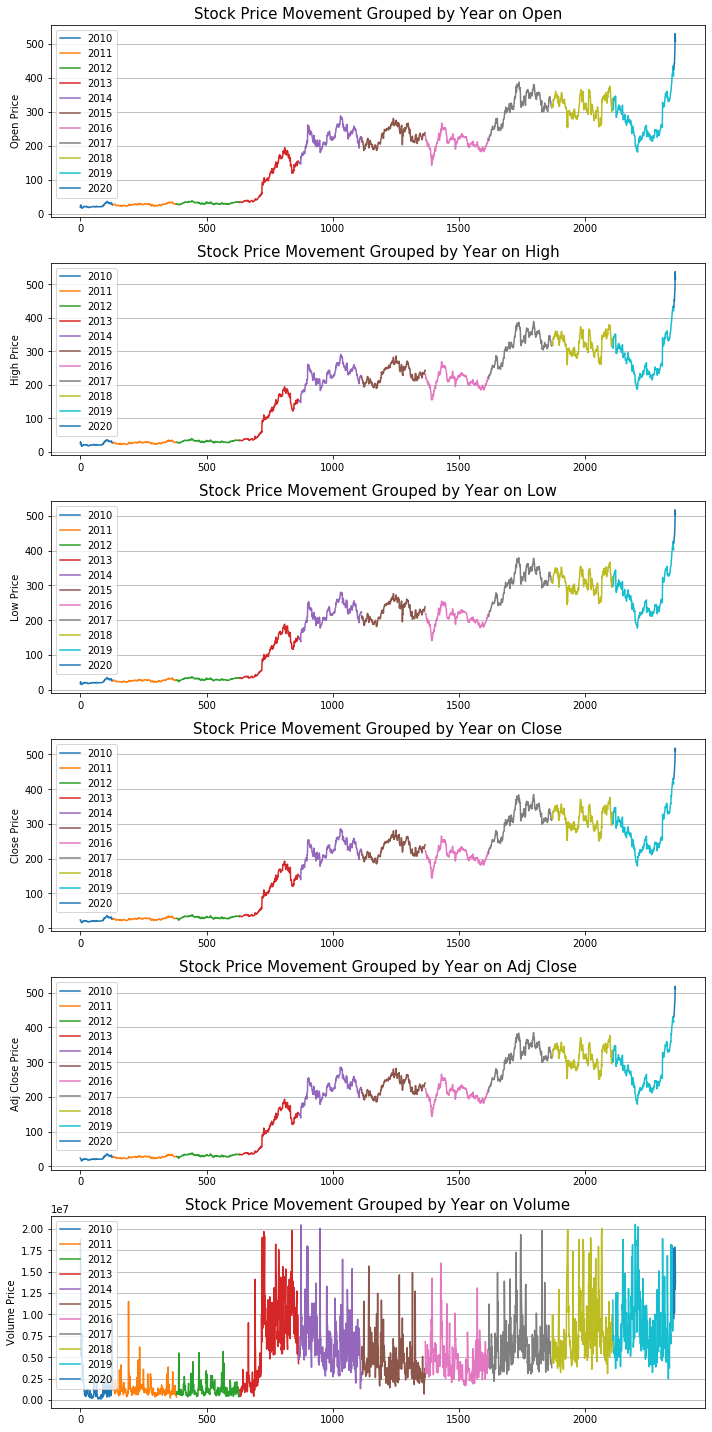

In [28]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Delete the index column due to reset
#del Data['index']

# Decompose the time series year-wise and month-wise to analyse further
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 15)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 10)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

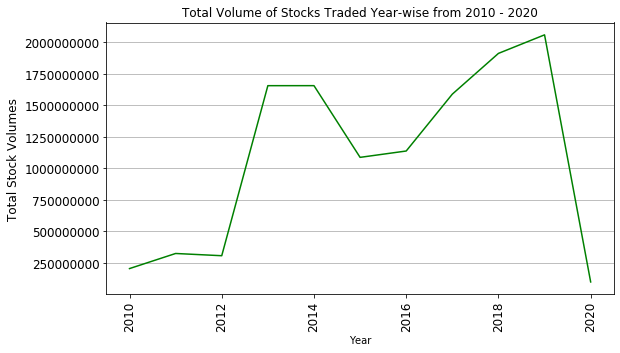

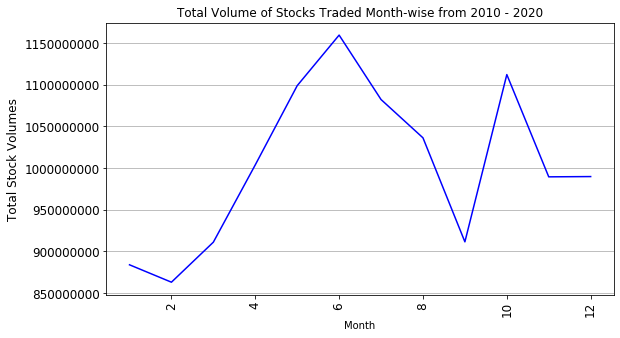

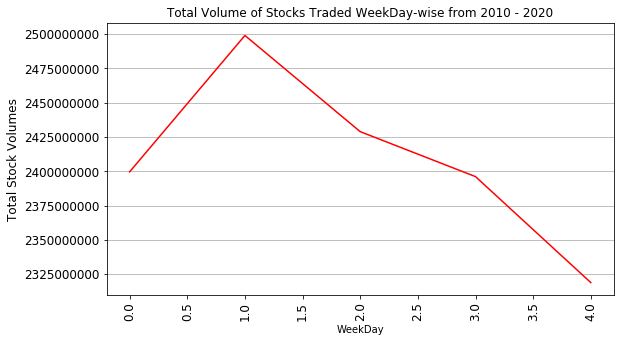

In [57]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2010 - 2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped month-wise
check = Data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2010 - 2020", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped weekday-wise
check = Data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise from 2010 - 2020", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Analysing the Yearly Trading Volume of the Stock using a Pie Chart

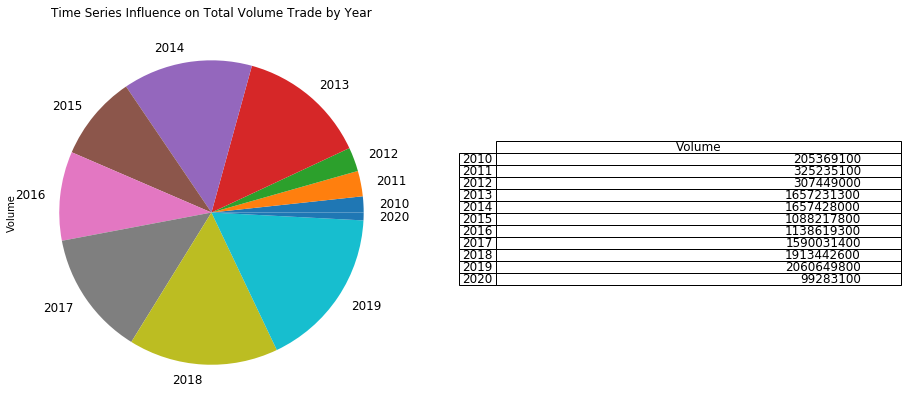

In [58]:

for i, col_list in enumerate(Column_List):
    var = Data.groupby('Year')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

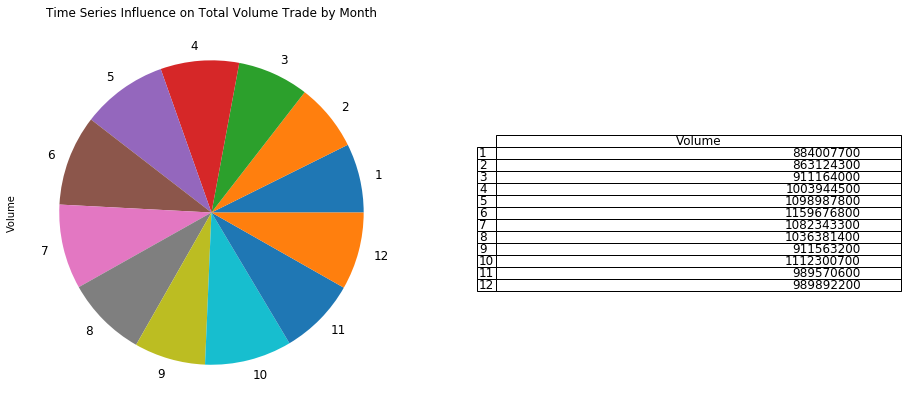

In [59]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

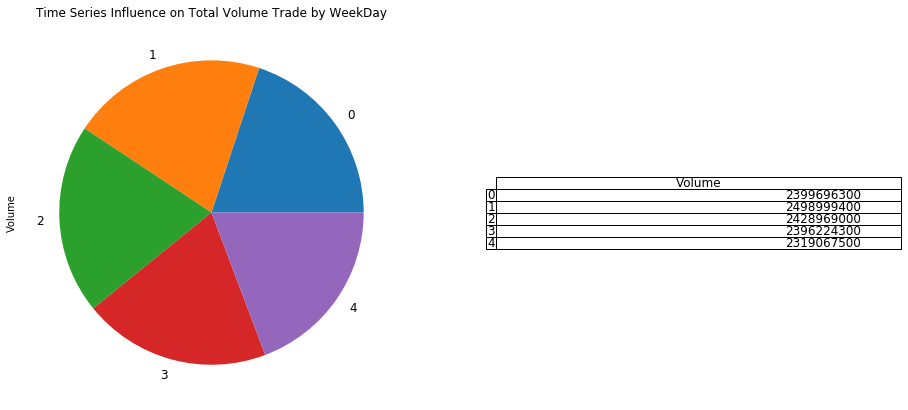

In [60]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('WeekDay')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()


# Findings and Conclusion



1. It is found that the stock volume trade spiked from 50 to around 200 from 2013 (Both Opening, Closing and Total Volumes) - Reasons may be change in policies, change in market, change in production, change in investors, etc., Hence, in the dataset does not provide additional reasons to analyze the cause of spike/dip

2. Since only a variant of data is available in 2020 (January to Feb 1st week), 2020 records could be considered void when comparing with grouped data (Year and Month)

3. The histogram distribution shows that the data is skewed to the left (Indication of values range between 0 - 400)

4. It is very evident that Open, Close, High, Low, Adj Close stock values are highly collinear and hence have a very strong relationship

5. As a general rule, any variable that shows (+/-) 0.5 strength is considered to have a significant impact on the target

6. The whisker plot indicates the presence of outliers (This could lead to false insights and recommendation). Hence, the outliers are removed based on standard techniques (Z-Score in this case)

7. Total stock volumes traded in a year/month/day over the entire historical data gives out some evident information for future improvements

8. When viewed by Year, the spike increased from 2012 through to 2020 thereby undergoing a dip in 2016

9. When viewed by Month, (January, June, July, August and September) showed extensive dip in stock trades whereas the other months showed substantial increase in trade

10. When viewed by Day, Monday and Tuesday seems to have recorded maximum trades rather than the rest

The next part of the project will focus on testing the stationarity of the variables and implementing time series forecasting methods to predict the stock market trades for both short-term and long-term horizons.